![](logo.png)


# Bayes Ingenuo

> __Alcance de la lectura__
> * Identificar los componentes del Teorema de Bayes
> * Reconocer el problema de probabilidad inversa y su solución con Bayes Ingenuo
> * Reconocer las diferentes formas de Bayes Ingenuo
> * Implementar algoritmos de Bayes Ingenuo con `sklearn`


---

# Motivación


A lo largo de esta lectura trabajaremos con el algoritmo Bayes Ingenuo, que permite desarrollar un modelo predictivo relativamente eficaz para lo simple de su implementación. Este algoritmo pertenece a la familia de los clasificadores __generativos__: aquellos que aprenden características de un modelo a partir de la probabilidad conjunta $\textsf{Pr}(x, y) $entre atributos $x \in \mathbf{X}^{\mathbb{R}}$ y un espacio finito de clases $y \in \mathbb{Y}$ para asignar clases a observaciones en base a $\textsf{Pr}(y\vert x)$ mediante el Teorema de Bayes. En la otra vereda se encuentran los clasificadores __discriminativos__: aquellos que aprenden las clases $\textsf{Pr}(y\vert x)$ de forma directa mediante una función objetivo de $\mathbf{X}$ a $y$. Para más detalles entre la relación de clasificadores generativos y discriminativos, pueden leer Ng y Jordan (2001).

Para ejemplificar esto trabajaremos con una base de datos sobre admisiones a la Universidad de California, Berkeley. En base a dos atributos (género y departamento de los postulantes), desarrollaremos un modelo Bayes Ingenuo Bernoulli para predicir de forma correcta aquellos casos que fueron admitidos. 


## Précis: Probabilidad Inversa mediante el Teorema de Bayes


El algoritmo Bayesiano Ingenuo tiene sus fundamentos en el Teorema de Bayes. Éste teorema gravita alrededor de la _probabilidad condicional_ (la probabilidad que un evento $A$ ocurra __condicional a la ocurrencia__ de otro evento $B$). Lo que busca el Teorema de Bayes es analizar la probabilidad del evento condicionante $B$, dado que ocurre el evento $A$. Consideremos el siguiente ejemplo:

_¿Qué pasa cuando una persona te sonríe cada vez que te ve? Esta es una de las incógnitas más grandes de la humanidad. Asumamos que sabemos que hay una probabilidad conjunta del 95% que cuando una persona le guste alguien, sonría. También sabemos que existe un 10% de probabilidad que le sonría a un extraño y un 1% que le guste alguien al azar. Podemos implementar el teorema de Bayes para encontrar una respuesta a este problema existencial._

El mantra Bayesiano reza: __En el contexto del Teorema de Bayes, dice que la probabilidad _a posteriori_ es proporcional a la _verosimilitud_ por la probabilidad _a priori_, ajustada por la _evidencia_.__ La forma canónica del teorema se representa como :

$$
\textsf{Pr}(\text{A posteriori}) = \frac{\textsf{Pr}(\text{Verosimilitud}) \times \textsf{Pr}(\text{A priori})}{\textsf{Pr}(\text{Evidencia})}
$$

Identifiquemos y reemplacemos los componentes en nuestra ecuación:

$$
\textsf{Pr}(\text{Le gusto } \vert \text{ Me sonríe}) = \frac{\textsf{Pr}(\text{Me sonríe } \vert \text{ Le gusto}) \times \textsf{Pr}(\text{Le gusto})}{  \textsf{Pr}(\text{Sonríe})}
$$

* $\textsf{Pr}(\text{Le gusto} \vert \text{Me sonríe})$ = es la probabilidad que le gustes sabiendo que te sonríe cuando te ve. Este es nuestra incógnita a resolver
* $\textsf{Pr}(\text{Me sonríe} \vert \text{Le gusto})$ = es la probabilidad que sonría asumiendo que le sonríe a la gente que le gusta. Esta es la información que asumimos, que hay una probabilidad del 95% que le sonría a las personas que le gusta.
* $\textsf{Pr}(\text{Le gusto})$ = es la probabilidad que le guste una persona al azar. Sabemos que hay un 1% de chances que esa persona le guste alguien al azar.
* $\textsf{Pr}(\text{Me sonríe})$ = es la probabilidad que le sonría a alguien al azar. Por último, tambien sabemos que hay un 10% de que esa persona sonría al azar a un extraño.

Para facilitar el desarrollo de esta ecuación, la implementaremos en Python mediante una función:


In [1]:
def bayes_solver(likelihood = .95, prior = 0.01, evidence = 0.1):
    return round(likelihood * prior / evidence, 3)


Con nuestra función, podemos averiguar la probabilidad a posteriori que le guste a alguien dado que me sonríe cada vez que me ve. Los resultados son desesperanzadores, tenemos un 9% de probabilidad que le gustemos a alguien dado que me sonríe.

In [2]:
bayes_solver()

0.095

¿Qué pasaría si sabemos que esa persona tiende a sonreír a mucha más gente que el promedio? Asumamos que le sonríe al 20% de la gente que ve. Nuestras probabilidades son aún peores.

In [3]:
bayes_solver(evidence=.20)

0.047

También sabemos que ésta persona tiende a gustarle muchas personas. Le gusta alrededor del 20% de las personas que ve. Si actualizamos nuestra función con estos resultados, recuperamos nuestras esperanzas a que le gustamos! :)

In [4]:
bayes_solver(prior=0.2, evidence=.2)

0.95

El ejercicio anterior demuestra la principal virtud del paradigma bayesiano: __nos permite incorporar información adicional al análisis__. De no haber considerado las probabilides de sonreír y afectividad, probablemente hubiésemos pasado un mal rato.


> __Digresión:__ Teorema de Bayes $\neq$ Métodos Bayesianos
>
> Un aspecto a considerar cuando implementamos el Teorema de Bayes con el código de arriba, es que no tiene nada de bayesiano. McElreath (2016, pp.50) recalca el hecho que el teorema de Bayes hace uso de la frecuencia de los eventos ocurridos, a diferencia de los métodos bayesianos que utilizan parámetros que se asumen fijos pero inciertos.
>
> Mientras que el Teorema de Bayes permitió definir un marco esencialmente frecuentista para resolver la probabilidad condicional inversa, los métodos bayesianos buscan realizar inferencia sobre los parámetros __a posteriori__ en función a cómo la información __a priori__ afecta a una función de __verosimilitud__. La inferencia bayesiana tardó en desarrollarse, dado que muchos de los problemas llegaban a soluciones intratables. Resulta que el problema de la intratabilidad se podía solucionar mediante los métodos __Markov Chain Monte Carlo (MCMC)__, que permiten muestrear a partir de una distribución probabilística.
> Esto queda más claro con la imagen de abajo, proveniente de _Kruschke, J. (2014). Doing Bayesian data analysis: A tutorial with R, JAGS, and Stan. Academic Press._
>
> ![](bayesiandogos.png)
> 
> La distribución _a posteriori_ ($\textsf{Pr} (\theta \vert \text{ Datos})$ representada con el Fox Terrier) es un compromiso entre la verosimilitud $(\textsf{Pr}(\text{ Datos} \vert \theta)$ representada con el Corgi) y la información _a priori_ de la verosimilitud $(\textsf{Pr}(\theta)$ representada con el Golden Retriever). Resulta que el Fox Terrier presenta orejas mitad caídas, representando el compromiso entre el Corgi y el Golden Retriever. Por último, el labrador $\textsf{Pr}(\text{Datos})$ está bostezando porque en los métodos MCMC la verosimilitud marginal de los datos importa poco.

## Bayes Ingenuo

Ya sabemos que el teorema de Bayes nos permite extraer la probabilidad inversa de un fenómeno mediante el ajuste de la verosimilitud de ocurrencia de un evento por la información previa existente. Una de las explicaciones más comunes del teorema de Bayes es lo que se conoce como el algoritmo Bayes Ingenuo, de aquí en adelante abreviado a __NB__ por su nombre en inglés, Naïve Bayes. En esta lectura implementaremos su versión más simple, el algoritmo NB Bernoulli, donde buscamos identificar la pertenencia de una observación a un conjunto finito de clases $y \in \mathbb{Y}$.

El objetivo del algoritmo es identificar la pertenencia de una observación a una determinada clase, basándose en los atributos medidos. De esta forma buscamos maximizar el estimador _a posteriori_ de la fórmula de Bayes. Para obtener un estimador _map_ (máximo a posteriori) en base al Teorema de Bayes, lo implementamos mediante:

$$
\textsf{Pr}(y\vert X) \propto \textsf{Pr}(y) \prod_{1 \leq k \leq n_{d}} \textsf{Pr}(X_{k} \vert y)
$$

donde $\textsf{Pr}(X_{k} \vert y)$ es la probabilidad condicional de ocurrencia del atributo $X_{k}$ en la clase $y \in \mathbb{Y}$, que representa la contribución del atributo en la clase (asumiendo que es la clase correcta). $\textsf{Pr}(y)$ es la probabilidad previa de ocurrencia de la clase. Dado que no tenemos suficiente información como para asumir $\textsf{Pr}$ como verdaderos, optamos por declarar sus estimados $\hat{\textsf{Pr}}$. Así, el problema de optimización es entrenar un modelo que maximize la clase más probable a ocurrir mediante la siguiente expresión: 

$$
\hat{y}_{\text{map}} = \underset{y\in\mathbb{Y}}{\textsf{argmax  }} \hat{\textsf{Pr}} (y \vert X) = \underset{y\in\mathbb{Y}}{\textsf{argmax  }} \hat{\textsf{Pr}(y)} \prod_{1 \leq k \leq n_{d}} \textsf{Pr}(X_{k} \vert y)
$$

Dado que estamos multiplicando un número grande de probabilidades condicionales por cada atributo entre $1 \leq k \leq n_{d}$, un problema computacional recurrente es el _floating point underflow_. Una de las soluciones más comunes es trabajar con el logaritmo de esta expresión, quedando como:

$$
\hat{y}_{\text{map}} = \underset{y\in\mathbb{Y}}{\textsf{argmax  }} \Big[\textsf{log }\hat{\textsf{Pr}}(y) + \sum_{1 \leq k \leq n_{d}} \textsf{log }\hat{\textsf{Pr}}(X_{k} \vert y)\Big]
$$

Los estimados de la probabilidad se obtienen a partir de:


* Para un _a priori_ no informativo, asumimos que la probabilidad de ocurrencia de las clases es uniforme.
$$
\hat{\textsf{Pr}}(y) = \frac{N_{y\in\mathbb{Y}}}{N}
$$


* Para la verosimilitud de ocurrencia de un atributo en una clase, obtenemos la frecuencia relativa de éste en las observaciones identificadas con la clase $y\in\mathbb{Y}$

$$
\hat{\textsf{Pr}}(X_{k} \vert y) = \frac{X_{yk}}{\sum X_{yk}}
$$

 Este tipo de modelo se conocen como __generativos__, dado que especifica un proceso aleatorio hipotético que genera las observaciones para cada clase. Este es el principal proceso en el entrenamiento del algoritmo.  Al algoritmo se le conoce como "ingenuo" dado que asume que todos los atributos $X_{1}, X_{2}, \ldots, X_{k}$ son independientes entre sí, lo cual simplifica el proceso de entrenamiento al asumir que los atributos no se afectan mutuamente.


Volviendo al ejemplo, al implementar el algoritmo sostenemos que condicional al estado de admitido/rechazado, el género y departamento del postulante son independientes entre sí. Este supuesto afirma que si algún postulante es hombre o mujer __no entrega información sobre el departamento que postuló__. 

# Ejemplo: Identificando la tasa de admitidos en UC-Berkeley

Para este caso implementaremos un algoritmo NB Bernoulli para identificar los de admisión a la Universidad de California, Berkeley. Los datos provienen de la publicación _Bickel, P. J., Hammel, E. A., and O'Connell, J. W. (1975). Sex bias in graduate admissions: Data from Berkeley. Science, 187, 398–403. http://www.jstor.org/stable/1739581._ La base de datos se compone de 3 atributos: _Género_ del alumno prospectivo (2 categorías), _Departamento_ al cual postula (6 categorías que representa cada departamento) y Resultado de la _Admisión_ (2 categorías que representan si fue admitido o no).



In [5]:
# añadimos las librerías clásicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lec3_graphs as gfx
# añadimos seaborn
import seaborn as sns

plt.style.use('seaborn')

Con nuestro ambiente de trabajo ya listo, vamos a importar `ucbaddmissions.csv` con `read_csv` y nos aseguraremos de eliminar la columna `Unnamed: 0` que se genera de forma automática.

In [6]:
df = pd.read_csv('ucbadmissions.csv').drop(columns='Unnamed: 0')
df

,Admit,Gender,Dept,Freq
0,Admitted,Male,A,512
1,Rejected,Male,A,313
2,Admitted,Female,A,89
3,Rejected,Female,A,19
4,Admitted,Male,B,353
5,Rejected,Male,B,207
6,Admitted,Female,B,17
7,Rejected,Female,B,8
8,Admitted,Male,C,120
9,Rejected,Male,C,205


Como primer paso exploratorio, veamos cuál es la distribución de cada atributo en nuestra base. Un problema que encontraremos es que nuestro `DataFrame` es una tabla procesada que muestra la frecuencia de la combinación de valores en `'Admit'`, `'Gender'` y`'Dept'`. Esto nos generará problemas posteriormente cuando queramos implementar nuestro modelo, dado la baja cantidad de datos.
Nuestra estrategia es aumentar artificalmente cada combinación de valores dado la frecuencia.

Para ello implementaremos una función que tome como argumento de ingreso la tabla agregada, y devuelva la cantidad de observaciones correctas mediante `deaggregate_statistics`.

In [7]:
# dado lo verboso de la función, ésta se encuentra en el archivo auxiliar
df_deagg = gfx.deaggregate_statistics(df)

Antes de seguir con nuestro análisis, debemos procurar que nuestra base desagregada represente la suma de `df['Freq']`. Esto lo logramos con una operación booleana simple. El resultado nos confiere que el procedimiento está bien hecho. Con nuestra base procesada, realizamos una serie de gráficos de barras por cada elemento.

In [8]:
# devuelve un booleano que compare la cantidad de observaciones en ambas bases
df_deagg.shape[0] == sum(df['Freq'])

True

In [9]:
df_deagg.head()

,Admit,Gender,Dept
0,Admitted,Male,A
1,Admitted,Male,A
2,Admitted,Male,A
3,Admitted,Male,A
4,Admitted,Male,A


Ahora podemos gráficar.

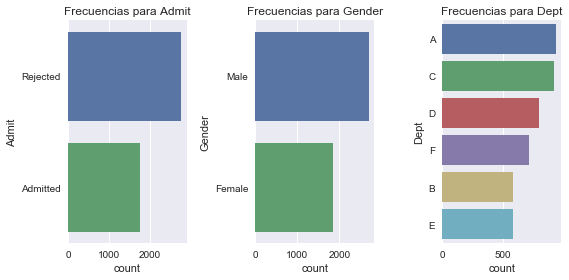

In [10]:
# definimos un canvas con tamaños fijos para mejorar la presentación
plt.figure(figsize=(8, 4))

# para cada elemento de nuestra columna, devuelve un número (n) y el elemento (i)
for n, i in enumerate(['Admit', 'Gender', 'Dept']):
    # generamos tres subplots en una fila
    plt.subplot(1, 3, n + 1)
    # generamos un contador de frecuencia con seaborn
    sns.countplot(y= df_deagg[i],
                  # ordenamos las frecuencias de mayor a menor
                  order = df_deagg[i].value_counts().index)
    # agregamos el título
    plt.title('Frecuencias para {}'.format(i))
    # mejoramos los márgenes
    plt.tight_layout()

UC Berkeley es una universidad pública de elite, por lo que las tasas de rechazados no resultan sorprendentes. Aproximadamente el 61% de los postulantes fueron rechazados. La mayoría de los postulantes fueron a los departamentos A y C (ambos con un 20%), pero en general la postulación fue homogénea. La mayoría de los postulantes fueron hombres (cercano al 60%) y el restante fueron mujeres.

In [11]:
for _ , i in df_deagg.iteritems():
    print(i.value_counts('%'),"\n")

Rejected    0.61224
Admitted    0.38776
Name: Admit, dtype: float64 

Male      0.594565
Female    0.405435
Name: Gender, dtype: float64 

A    0.206142
C    0.202828
D    0.174989
F    0.157755
B    0.129253
E    0.129032
Name: Dept, dtype: float64 



In [12]:
df_deagg['Dept'].unique()

array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=object)

## Implementado un algoritmo Naive Bayes

Para implementar el modelo, utilizaremos la clase `BernoulliNB` dentro del módulo `linear_model` de la librería `sklearn`. Como el algoritmo NB es un problema de _clasificación supervisada_ dado que tenemos conocimiento sobre la cantidad de clases $y$ en un espacio finito $\mathbb{Y}$, debemos importar de manera adicional las métricas de desempeño más comunes como `roc_auc_score`, `roc_curve`, `confusion_matrix`.

Considerando que todos los registros en la base desagregada son strings, debemos transformar estos atributos categórico a numéricos para facilitarle el trabajo a `sklearn`. Para ello implementaremos la clase `LabelEncoder` que se encuentra en el módulo `preprocessing` de `sklearn`. Nuestro primer paso es convertir los atributos. `LabelEncoder` genera un encoding entre 0 y la cantidad de clases -1. Para generar nuestra recodificación, posterior a la inicialización de la clase `LabelEncoder` implementamos el método `fit_transform` que devuelve las etiquetas numéricas. El modelo que implementaremos sólo admite variables binarias, por lo que implementaremos el método `pd.get_dummies` para extraer una serie de binarias por cada categoría de departamentos.

In [13]:
# importamos los módulos de sklearn
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# instanciamos el objeto
lbl = LabelEncoder()

# Implementamos el método fit_transform para actualizar y sobreescribir cada columna de atributos
df_deagg['Gender'] = lbl.fit_transform(df_deagg['Gender'])
df_deagg['Admit'] = lbl.fit_transform(df_deagg['Admit'])

# generamos una serie de dummies en base a Dept y las concatenamos a nuestra base. 
# posteriormente, eliminamos la columna Dept
df_deagg = pd.concat([df_deagg, pd.get_dummies(df_deagg['Dept'], prefix='dept')], axis=1).drop(columns='Dept')

In [14]:
# solicitemos las últimas 5 observaciones de nuestra base
df_deagg.tail()

,Admit,Gender,dept_A,dept_B,dept_C,dept_D,dept_E,dept_F
4521,1,0,0,0,0,0,0,1
4522,1,0,0,0,0,0,0,1
4523,1,0,0,0,0,0,0,1
4524,1,0,0,0,0,0,0,1
4525,1,0,0,0,0,0,0,1


In [16]:
# Verifiquemos que la variable Admit esta lista para ser procesada por el clasificador
df_deagg['Admit'].value_counts('%')

1    0.61224
0    0.38776
Name: Admit, dtype: float64

Posterior a la reconversión de los valores, seguimos con nuestro flujo básico de trabajo generando muestras de entrenamiento y validación con `train_test_split`, dejando un 30% de la muestra como validación y declarando una semilla pseudoaleatoria.

In [17]:
from sklearn.model_selection import train_test_split

X_train_mat, X_test_mat, y_train_vec, y_test_vec = train_test_split(df_deagg.loc[:, 'Gender':'dept_F'],
                                                                    df_deagg['Admit'],
                                                                    test_size=.30,
                                                                    random_state=11238)

In [18]:
X_train_mat.shape

(3168, 7)

### El clasificador `BernoulliNB()`

Siguiendo el flujo de trabajo, lo que debemos hacer es generar una instancia del Clasificador. La documentación de `BernoulliNB()` hace referencia a 4 hiperparámetros a considerar:
1. `alpha`: Añade un parámetro aditivo a la probabilidad $\hat{\textsf{Pr}}(X_{k} \vert y)$. Esta adición permite superar el problema del _floating point underflow_ cuando nos encontramos con probabilidades $\hat{\textsf{Pr}}(X_{k} \vert y) = 0$. Cuando `alpha=1`, se llama suavización de Laplace y cuando `alpha` es un decimal entre 0 y 1 se conoce como suavización de Lidstone.
- `binarize`: Implementado cuando los atributos son contínuos y se necesita declarar un umbral para la binarización.
- `fit_prior`: Por defecto calcula la probabilidad _a priori_ de cada clase en la muestra de entrenamiento. Si es `False`, asume una distribución uniforme en base a $1/N_{y\in\mathbb{Y}}$.
- `class_prior`: Permite ingresar la probabilidad _a priori_ para cada clase en el algoritmo de entrenamiento. Por defecto es `None`.

Nuestro primer modelo tomará los argumentos por defecto de la clase. Partimos por instanciar un objeto y posteriormente implementar el método `.fit` donde ingresamos nuestra matriz de atributos (`X_train_mat`) y vector objetivo (`y_train_vec`). Python nos informa sobre los hiperparámetros especificados en la clase. Por defecto asume una suavización con un `alpha=1` y sin un umbral de binarización declarado, dado que nuestros atributos ya están binarizados de forma previa. Para este modelo inicial no añadiremos información _a priori_.

In [19]:
nb_classifier = BernoulliNB()
nb_classifier.fit(X_train_mat, y_train_vec)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

Una vez realizado el `fit` de nuestro modelo, el siguiente paso es realizar las predicciones. Siguiendo el flujo clásico del aprendizaje de máquinas, debemos ingresar la matriz de atributos reservada para validación. Como todo modelo de clasificación implementado de `sklearn`, podemos extraer tres predicciones a partir de nuestro modelo entrenado. 

#### El logaritmo de la probabilidad

La primera opción es extraer el logaritmo de la probabilidad con `predict_log_proba` para cada una de las clases $y \in \mathbb{Y}$. Este es el resultado directo de resolver $\underset{y\in\mathbb{Y}}{\textsf{argmax}}$. Si ingresamos nuestra matriz de validación y solicitamos por el logaritmo de la probabilidad para cada una de las clases estimadas. En este ejemplo deseamos saber cuáles son los valores para la primera observación. Observamos que la clase 0 tiene un menor logaritmo de la probabilidad.

In [20]:
nb_log_prob_pred = nb_classifier.predict_log_proba(X_test_mat)
nb_log_prob_pred[0]

array([-0.46562497, -0.9881699 ])

#### La probabilidad

El problema del logaritmo de la probabilidad es que es intuitivo para el computador (porque evita trabajar con productorias), pero poco intuitivo para el ser humano. Resulta que si exponenciamos cada uno de los elementos, obtendremos la probabilidad de pertenencia a cada clase mediante el método `predict_proba`.

In [21]:
nb_prob_pred = nb_classifier.predict_proba(X_test_mat)
nb_prob_pred[0]

array([0.62774266, 0.37225734])

Como toda probabilidad, la suma de todos los eventos debe ser 1

In [22]:
np.sum(nb_prob_pred[0]).round(2)

1.0

Para asegurarnos que la exponenciación de `nb_log_prob_pred` sea igual a los resultados entregados por `nb_prob_pred` podemos ejecutar una expresión booleana preguntando si los valores de ambos objetos son iguales.

In [23]:
nb_prob_pred[0] == np.exp(nb_log_prob_pred[0])

array([ True,  True])

#### La clase asignada siguiendo el principio máximo _a posteriori_ de la probabilidad

Finalmente, se asigna la clase en base a la maximización del estimado _a posteriori_.

In [24]:
nb_class_pred = nb_classifier.predict(X_test_mat)
nb_class_pred[0]

0

## Métricas de desempeño en el algoritmo NB

Dado que el problema que busca resolver el algoritmo es el de asignar alguna clase en un espacio finito a una observación específica, implementamos una estrategia supervisada donde analizamos el desempeño del algoritmo en clasificar de manera adecuada los casos correctamente predichos. Esto lo logramos mediante el contraste entre las predicciones en nuestra muestra de validación y las clases verdaderas. 

El primer elemento lo logramos mediante una matriz de confusión, que permite contrastar las clases verdaderas con el pronóstico del modelo. Mediante este cruce extraemos información sobre la tasa de verdaderos (Clasificaciones correctamente predichas) y falsos (Clasificaciones incorrectas).

Para implementar una matriz de confusión importamos el método `confusion_matrix` del módulo `metrics` de la librería `sklearn`.

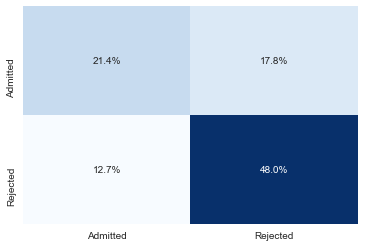

In [25]:
from sklearn.metrics import confusion_matrix

# en base a un vector de clases predichas
y_hat = nb_classifier.predict(X_test_mat)
# generar una matriz confusa donde el primer argumento es el vector de prueba
# y el segundo es el vector de clases predichas.
# el resultado lo dividimos por el largo del vector de prueba
# para obtener un porcentaje por sobre la cantidad de casos
cnf = confusion_matrix(y_test_vec, y_hat)/len(y_test_vec)

# guardamos las etiquetas de las clases
target_label = ['Admitted', 'Rejected']

# Implementamos un mapa de calor definiendo las clases
sns.heatmap(cnf, xticklabels=target_label,
            yticklabels=target_label,
            # generamos las anotaciones en términos porcentuales
            annot=True, fmt=".1%", 
            # evitamos la barra y cambiamos el colormap
            cbar=False, cmap='Blues')

Nuestro modelo clasifica de forma correcta aproximadamente el 70% de los casos como positivos o negativos. El modelo tiende a desempeñarse de peor manera para predicir los casos aceptados, en comparación a los casos rechazados.

Otra manera de observar esto es mediante la obtención de métricas de desempeño como el `classification_report`, que entrega la precisión (Porcentaje de identificaciones positivas correctas por sobre el total de predicciones como positivas), el recall (Porcentaje de identificaciones positivas por sobre el total de predicciones correctas) y el F1 (Media armónica entre Precision y Recall).

In [26]:
from sklearn.metrics import classification_report
# generar un reporte de métricas de precisión, recall y f1
print(classification_report(y_test_vec, y_hat))

              precision    recall  f1-score   support

           0       0.63      0.55      0.58       533
           1       0.73      0.79      0.76       825

   micro avg       0.69      0.69      0.69      1358
   macro avg       0.68      0.67      0.67      1358
weighted avg       0.69      0.69      0.69      1358



Las métricas reportadas apoyan el diagnóstico realizado con la matriz de confusión. El modelo tiene un mejor desempeño para predicir correctamente los rechazados por sobre los aceptados. Las métricas tienen valores más altos para los casos clasificados como rechazados. Para todas las métricas, los puntajes son mayores que en comparación al promedio global de la muestra.

Por último, siempre es bueno graficar el rango de errores con el cual opera nuestro modelo. Para ello implementamos la curva ROC (Receiving Operating Characteristics), que evalúa la relación entre falsos positivos (cuando el modelo etiqueta erróneamente) y falsos negativos (cuando el modelo ignora etiquetas). También solicitaremos el área bajo la curva ROC.

Para implementarlo ocupamos los métodos `roc_curve` y `roc_auc_score` del módulo `metrics` de la librería `sklearn`.

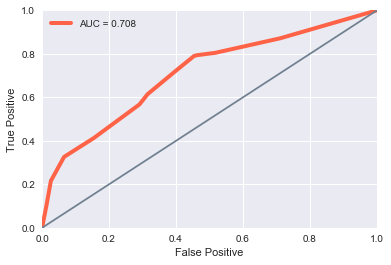

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score

# para implementar el área bajo la curva necesitamos el puntaje
# de probabilidad, no la clase predicha. Para ello implementamos predict_proba
y_hat_pr = nb_classifier.predict_proba(X_test_mat)[:,1]

# el método roc_curve devuelve 3 elementos: falsos positivos, verdaderos positivos,
# y threshold. Este último lo podemos ignorar con _
fpr, tpr, _ = roc_curve(y_test_vec, y_hat_pr)

# podemos obtener el área bajo la curva roc con roc_auc_score
auc = round(roc_auc_score(y_test_vec, y_hat_pr), 3)

# graficamos
plt.plot(fpr, tpr, label="AUC = {}".format(auc), color='tomato', lw=4)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.axis([0, 1, 0, 1])
# graficamos el clasificador por chance.
plt.plot([0, 1], [0, 1], color='slategrey')
plt.legend()

Para evaluar la idoneidad de nuestro modelo y su capacidad predictiva, necesitamos generar un benchmark analítico, que generalmente se traduce en un clasificador correcto por chance. Éste toma la forma matemática de $1/\mathbb{Y}$.

En este caso estamos trabajando con dos clases, por lo que la probabilidad de tener una clasificación correcta dado que la etiquetamos al azar es del 50%. Nuestros modelos deben superar este benchmark para considerarlos eficientes. En este caso, nuestro modelo tiene un desempeño un 20% superior a clasificar correctamente al azar una observación.

# Efecto de la probabilidad a priori en el modelo

Un aspecto a considerar en el algoritmo NB (y de manera más general en el marco analítico Bayesiano), es la ventaja de poder ingresar información previa sobre cómo se comportan nuestras clases. Esta información conocida como probabilidad _a priori_, interactúa con la verosimilitud del evento para actualizarlo en función del comportamiento pasado.

Por defecto, `BernoulliNB` infiere las clases _a priori_ a partir de la frecuencia empírica de ocurrencia de estas. Una vez inicializado nuestro modelo podemos ingresar al logaritmo de la probabilidad con `BernoulliNB().class_log_prior_`. Exponenciando este array obtenemos la probabilidad _a priori_ de ocurrencia de cada clase.

In [28]:
np.exp(nb_classifier.class_log_prior_).round(2)

array([0.39, 0.61])

Podemos asegurarnos que el modelo aprenderá la información _a priori_ a partir de la frecuencia de ocurrencia del vector objetivo, de manera tal de no intervenir el modelo. Si solicitamos el value counts de nuestro vector objetivo __antes de ser segmentado__ obtendremos resultados similares.

In [29]:
df_deagg['Admit'].value_counts('%').round(2)

1    0.61
0    0.39
Name: Admit, dtype: float64

Ahora generaremos un experimiento donde someteremos nuestro algoritmo clasificador a distintas especificaciones sobre la ocurrencia previa de las clases. En la función `compare_priors` comparamos las métricas Accuracy, Recall, Precision, F1 y AUC para las siguientes especificaciones, dado los priors y las muestras de entrenamiento y validación:

### Caso 1: a priori no informativo

En este caso las métricas son idénticas a las reportadas en el modelo, puesto que por defecto infiere la frecuencia de cada clase. 

In [30]:
gfx.compare_priors(X_train=X_train_mat,
                   X_test=X_test_mat,
                   y_train=y_train_vec,
                   y_test=y_test_vec,
                   prior=[0.39, 0.61])

A priori: [0.39, 0.61]
Accuracy: 0.694
Recall: 0.79
Precision: 0.729
F1: 0.759
AUC: 0.708



### Caso 2: A priori, clases extremadamente balanceadas

Al asumir que ambas clases tienen iguales chances de ocurrir. En este escenario hay un empeoramiento general del modelo, ya que hay una disminución en el desempeño de las métricas. El modelo asume en base a la información previa que como antes habían más postulantes aceptados y menos rechazados, la verosimilitud tiende a incorporar ésta información conllevando a una pérdida en la tasa general de clasificaciones correctas (Accuracy).

In [31]:
gfx.compare_priors(X_train=X_train_mat,
                   X_test=X_test_mat,
                   y_train=y_train_vec,
                   y_test=y_test_vec,
                   prior=[.5, .5])

A priori: [0.5, 0.5]
Accuracy: 0.672
Recall: 0.713
Precision: 0.738
F1: 0.725
AUC: 0.708



### Caso 3: Clases desbalanceadas. 4 de 5 entran

En este caso se encuentra una mayor precisión en el modelo, lo que significa que identifica bien quienes están clasificados como rechazados entre los correctamente clasificados. Esto se debe a que estamos aumentando de manera substancial el efecto de la información a priori en los aceptados.

In [32]:
gfx.compare_priors(X_train=X_train_mat,
                   X_test=X_test_mat,
                   y_train=y_train_vec,
                   y_test=y_test_vec,
                   prior=[.8, .2])

A priori: [0.8, 0.2]
Accuracy: 0.513
Recall: 0.216
Precision: 0.927
F1: 0.35
AUC: 0.708



### Caso 4: Berkeley en el 2015

Podemos actualizar nuestro algoritmo para ver cómo se comportarían ésta muestra en base a los últimos datos disponibles sobre las tasas de aceptación. La información disponible en el sitio web de Berkeley (https://admissions.berkeley.edu/student-profile) sugiere que aproximadamente un 17% de los postulantes son aceptados, con un 83% rechazados. ¿Cómo se comportaría nuestra predicción en base a esta información?

Resulta que al implementar priors correspondientes al 2015, nuestro modelo mejora en su puntaje F1, así como en el Recall, por lo que nuestro modelo mejora en la capacidad de predecir correctamente tanto positivos como negativos.

In [33]:
gfx.compare_priors(X_train=X_train_mat,
                   X_test=X_test_mat,
                   y_train=y_train_vec,
                   y_test=y_test_vec,
                   prior=[.17, .83])

A priori: [0.17, 0.83]
Accuracy: 0.643
Recall: 0.872
Precision: 0.655
F1: 0.748
AUC: 0.708



# Aspectos Adicionales

A nivel de módulo, `sklearn.naive_bayes` también presenta variantes del algoritmo ingenuo para casos donde nuestro vector objetivo tiene más de 2 clases posibles (conocido como el Multinoulli Naive Bayes) y una variante donde nuestros atributos son contínuos y podemos implementar una distribución Gaussiana para aproximarnos a las clases (conocido como el Gaussian Naive Bayes). 


* `MultinomialNB`: Puede ser implementado cuando deseamos realizar un modelo predictivo con $\mathbb{Y} \geq 2$ y podemos aproximarnos mediante la distribución Multinoulli con forma

$$
\textsf{Pr}(X \vert y) = \prod_{i\leq k \leq n_{d}} \textsf{Cat}(X_{k} \vert \boldsymbol{\mu}_{yk})
$$

donde $\boldsymbol{\mu}_{yk}$  es una mezcla de valores posibles $\forall y \in \mathbb{Y}$. Al instanciar un objeto con esta clase, los hiperparámetros a considerar son los mismos que en el `BernoulliNB`.



* `GaussianNB`: Lo podemos implementar cuando los atributos son contínuos y podemos implementar la distribución Gaussiana para aproximarnos a las clases con forma

$$
\textsf{Pr}(X \vert y) = \prod_{i\leq k \leq n_{d}} \textsf{Normal}(X_{k} \vert \mu_{yk}, \sigma^{2}_{yk})
$$

donde $\mu_yk$ es la media del atributo $k$ en la clase $y$, y $\sigma^{2}_{yk}$ es su varianza. Al instanciar un objeto con esta clase, los hiperparámetros a considerar son las probabilidades _a priori_. En caso de desear mayor estabilidad de los cálculos, se puede alterar `var_smoothing` para modificar la porción de la varianza conjunta de los atributos que se asigna a la varianza individual.


### Pros y Cons


El algoritmo bayesiano ingenuo presenta una serie de virtudes:
* Es intuitivo en términos conceptuales, porque buscamos encontrar la clase más probable de una observación teniendo en cuenta la probabilidad de ocurrencia de un atributo específico en una clase.
* Su complejidad algorítmica es $\mathcal{O}(ND)$ donde $N$ es la cantidad de clases y $D$ la cantidad de atributos, lo cual lo hace relativamente rápido e inmune a _overfitting_ (Murphy, 2013. pp. 82).
* Suele desempeñarse bien, independiente del problema. Esto lo transforma en uno de los primeros modelos generativos que se puede implementar para analizar un problema de clasificación.
* Su baja complejidad algorítmica facilita la inclusíón de grandes cantidades de atributos.
* Dado que es un modelo generativo, maneja de mejor manera los datos perdidos.
* Además, también debido a que es generativo, permite simular data sintética, lo que es útil para realizar data augmentation o simular fenómenos.

Algunas de sus desventajas:

* Su nombre lo dice todo: Es un algoritmo ingenuo que descansa en el supuesto que todos los atributos son independientes entre sí, condicional a la clase. Esto suele generar situaciones donde hay baja varianza y alto sesgo (Hand y Yu, 2010).


# Referencias

* Hand, D, J y Yu, K. 2010. Idiot's Bayes: Not So Stupid After All?. International Statistical Review. 69(3).
* Stone, K. 2013. Bayes Rule: A tutorial introduction to Bayesian Analysis. Sebtel Press. Ch: 1 An Introduction to Bayes Rule.
* Manning, C; Schütze, H. 1999. Foundations of Statistical Natural Language Processing. Cambridge, MA: Massachusetts Institute of Technology. Ch7: Word Sense Disambiguation.
* Hastie, T; Tibshirani, T; Friedman, J. 2008. The Elements of Statistical Learning: Data Mining, Inference, and Prediction. Springer Series in Statistics. Springer. Ch6: Kernel Smoothing Methods.
* Ng, A; Jordan, M. 2001. On Discriminative vs. Generative classifier: A comparison of logistic regression and naïve Bayes.
* McElreath, R. 2016. Statistical Rethinking. A Bayesian Course with Examples in R and Stan. Ch. 3: Sampling the Imaginary.